In [103]:
import tqix, constant, base
import numpy as np
import importlib
importlib.reload(constant)
importlib.reload(base)
n = 5
lambdax = 0.05

def H_LMG(h, lambdax, n, Jx, Jy, Jz):
    return -2*h*Jz - 2*lambdax/n*(Jx**2 - Jy**2)

# def get_psi(thetas, n):
#     qc = qiskit.QuantumCircuit(n)
#     for i in range(0, n, 3):
#         qc.rx(thetas[i], 0)
#         qc.rz(thetas[i + 1], 1)
#         qc.rx(thetas[i + 2], 2)
#     return qiskit.quantum_info.Statevector.from_instruction(qc).data

def cost_function(thetas, h):

    qc = tqix.circuit(n)
    for i in range(0, n):
        qc.RX(thetas[i], i)
        qc.RZ(thetas[i + n], i)
        qc.RX(thetas[i + 2 * n], i)
        
    Jx = qc.Jx()
    Jy = qc.Jy()
    Jz = qc.Jz()
    # print("Jx: ", Jx.toarray())
    # print("Jy: ", Jy.toarray())
    # print("Jz: ", Jz.toarray())
    h_LMG = H_LMG(h, lambdax, n, Jx, Jy, Jz)
    psi = qc.state
    
    return np.real(np.trace((h_LMG @ psi).toarray()))

def optimal(h):
    costs = []
    thetass = []
    thetas = np.ones(n*3)
    for i in range(0, 20):
        thetass.append(thetas)
        thetas = thetas - constant.learning_rate*base.two_prx(cost_function, thetas, h)
        costs.append(cost_function(thetas, h))
    np.savetxt("cost_" + str(h) + ".txt", costs)
    np.savetxt("thetas_" + str(h) + ".txt", thetass)

In [87]:
hs = np.round(np.arange(-0.1, 0.1, 0.002), 3)
for h in hs:
    print(h)
    optimal(h)

-0.01


c:\Users\haime\OneDrive\Documents\GitHub\Lagrange interpolation approach for GPRX\base.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[i] = constant.two_term_psr["r"] * (
c:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


-0.008
-0.006
-0.004
-0.002
0.0
0.002
0.004
0.006
0.008


c:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


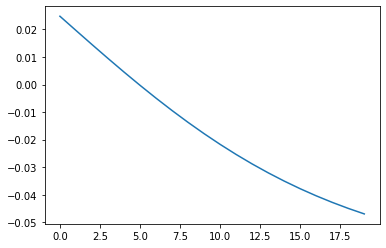

In [92]:
cost = np.loadtxt("cost_-0.008.txt", dtype=np.complex_)
plt.plot(cost)

In [83]:
hs = np.round(np.arange(-0.1, 0.11, 0.01), 2)
hs1 = np.round(np.arange(-0.01, 0.01, 0.001), 3)
large_hs = np.concatenate((hs, hs1), axis=None)
large_hs = np.sort(large_hs)
costs = []
for h in large_hs:
    cost = np.loadtxt("cost_" + str(h) + ".txt", dtype=np.complex_)[-1]
    costs.append(np.real(cost))

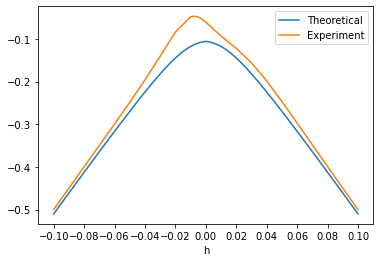

In [84]:
import pandas as pd
cost_theori = pd.read_excel('data.xlsx')
cost_theori = np.array(cost_theori)

plt.plot([d[0] for d in cost_theori], [d[1] for d in cost_theori], label = "Theoretical")
plt.plot(large_hs, costs, label = "Experiment")
plt.xticks([-0.1,-0.08,-0.06, -0.04,-0.02,0, 0.02, 0.04, 0.06, 0.08, 0.1])
plt.xlabel("h")
plt.legend()
plt.show()

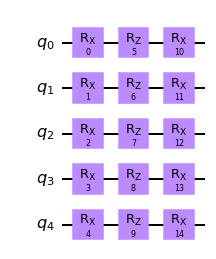

In [10]:
import qiskit
n = 5
thetas = np.zeros(3*n)
for i in range(0, thetas.shape[0]):
    thetas[i] += i
qc = qiskit.QuantumCircuit(n)
for i in range(0, n):
    qc.rx(thetas[i], i)
    qc.rz(thetas[i+n], i)
    qc.rx(thetas[i+2*n], i)
qc.draw('mpl')